# Time Series Analysis with Python and Prophet

* Ref: [http://intelligentonlinetools.com/blog/2017/12/17/time-series-analysis-python-prophet/](http://intelligentonlinetools.com/blog/2017/12/17/time-series-analysis-python-prophet/)
* Data: 原文沒有提供，所以我用 TSLA.csv

* Prophet 用 saturating growth model 和 a piecewise linear model

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from IPython.display import display

In [8]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 1. Load data

In [20]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/TSLA.csv',
                 index_col=0,
                 parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-10,262.220001,263.000000,257.820007,259.149994,259.149994,2610900
2015-07-13,262.250000,262.549988,256.049988,262.160004,262.160004,2960300
2015-07-14,262.100006,265.989990,260.510010,265.649994,265.649994,1907600
2015-07-15,266.739990,267.489990,262.079987,263.140015,263.140015,2021600
2015-07-16,264.220001,267.200012,263.160004,266.679993,266.679993,1616000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-07-10 to 2020-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


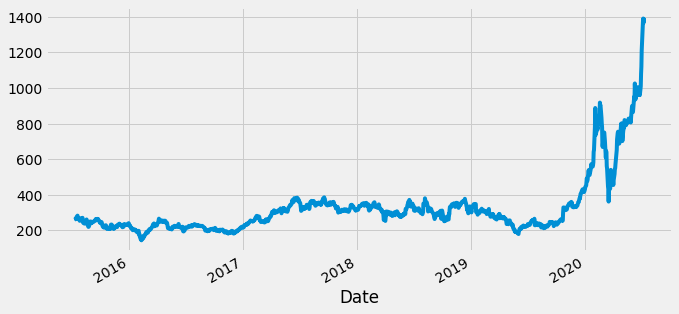

In [22]:
# visualization
fig, ax = plt.subplots(figsize=(10, 5))
df['Close'].plot(ax=ax)
plt.show()

In [23]:
df.reset_index(inplace=True)
df = df[['Date', 'Close']]
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df.head()

,ds,y
0,2015-07-10,259.149994
1,2015-07-13,262.160004
2,2015-07-14,265.649994
3,2015-07-15,263.140015
4,2015-07-16,266.679993


## 2. Analysis

## 3. Forecast

In [24]:
from fbprophet import Prophet
# Fitting
model = Prophet()
model.fit(df)

# 建立一個空的 dataframe
df_future = model.make_future_dataframe(periods=180, freq='d') # 預測未來 180 天的股價

# 做預測
df_forecast = model.predict(df_future)
df_forecast.head()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-10,256.815337,246.307869,379.564276,256.815337,256.815337,61.002662,61.002662,61.002662,-3.842418,-3.842418,-3.842418,64.845080,64.845080,64.845080,0.0,0.0,0.0,317.817999
1,2015-07-13,256.298902,243.755586,377.658492,256.298902,256.298902,56.310111,56.310111,56.310111,-0.021341,-0.021341,-0.021341,56.331452,56.331452,56.331452,0.0,0.0,0.0,312.609013
2,2015-07-14,256.126756,249.051018,375.390927,256.126756,256.126756,54.207073,54.207073,54.207073,0.936192,0.936192,0.936192,53.270881,53.270881,53.270881,0.0,0.0,0.0,310.333830
3,2015-07-15,255.954611,242.912150,374.259792,255.954611,255.954611,51.724672,51.724672,51.724672,1.562887,1.562887,1.562887,50.161785,50.161785,50.161785,0.0,0.0,0.0,307.679283
4,2015-07-16,255.782466,234.973790,365.792685,255.782466,255.782466,47.251325,47.251325,47.251325,0.208410,0.208410,0.208410,47.042915,47.042915,47.042915,0.0,0.0,0.0,303.033792


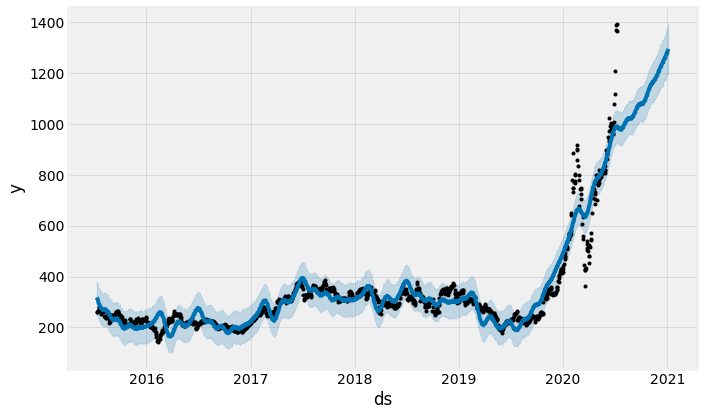

In [25]:
# visualization
fig = model.plot(df_forecast)

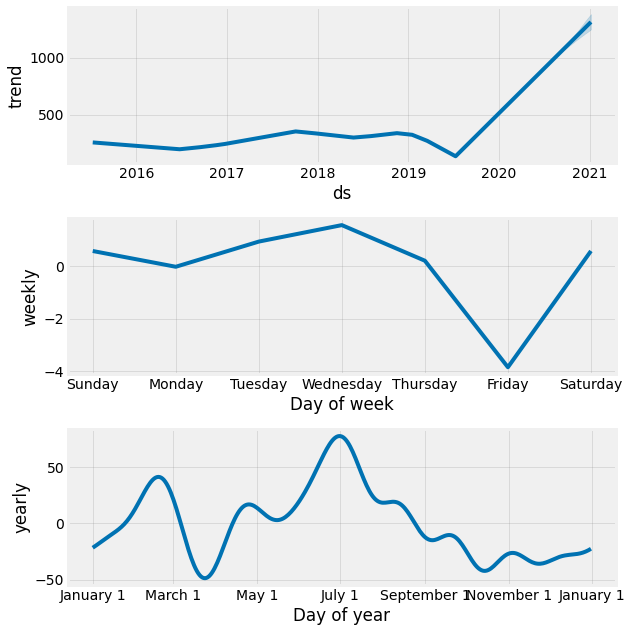

In [26]:
# visualization
fig = model.plot_components(df_forecast)